<a href="https://colab.research.google.com/github/semesarker/A-Text-Independent-Speech-Emotion-Recognition-Based-on-Convolution-Neural-Network/blob/main/CNN_2D_Model_using_only_Melspectrogram_feature_on_Ravdess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip
   creating: rav/
   creating: rav/Actor_01/
  inflating: rav/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-02-01.wav  
  infl

In [ ]:
!unzip '/content/drive/MyDrive/thesis/TESS.zip'

Archive:  /content/drive/MyDrive/thesis/TESS.zip
   creating: TESS/
   creating: TESS/OAF_angry/
  inflating: TESS/OAF_angry/OAF_back_angry.wav  
  inflating: TESS/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS/OAF_angry/OAF_base_angry.wav  
  inflating: TESS/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS/OAF_angry/OAF_book_angry.wav  
  inflating: TESS/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS/OAF_angry/OAF_cab_angry.wav  
  inflating: TESS/OAF_angry/OAF_calm_angry.wav  
  inflating: TESS/OAF_angry/OAF_came_angry.wav  
  inflating: TESS/OAF_angry/OAF_cause_angry.wav  
  inflating: TESS/OAF_angry/OAF_chain_angry.wav  
  inflating: TESS/OAF_angry/OAF_chair_angry.wav  
  inflating: TESS/O

In [ ]:
# Keras
#import tensorflow as tf
from IPython.display import Audio
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


# from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
Ravdess = '/content/rav'
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list

['Actor_12',
 'Actor_13',
 'Actor_22',
 'Actor_10',
 'Actor_21',
 'Actor_16',
 'Actor_11',
 'Actor_06',
 'Actor_07',
 'Actor_05',
 'Actor_20',
 'Actor_24',
 'Actor_08',
 'Actor_19',
 'Actor_17',
 'Actor_15',
 'Actor_01',
 'Actor_18',
 'Actor_23',
 'Actor_14',
 'Actor_03',
 'Actor_09',
 'Actor_04',
 'Actor_02']

In [ ]:
# Ravdess preprocess
ravdess_directory_list = os.listdir(Ravdess)
file_path = []
file_emotion = []
for directory in ravdess_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(Ravdess + '/' + directory)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + directory + '/' + file)

In [ ]:
file_path

['/content/rav/Actor_12/03-01-08-01-01-01-12.wav',
 '/content/rav/Actor_12/03-01-06-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-03-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-05-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-03-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-02-02-02-01-12.wav',
 '/content/rav/Actor_12/03-01-03-02-01-02-12.wav',
 '/content/rav/Actor_12/03-01-01-01-01-01-12.wav',
 '/content/rav/Actor_12/03-01-02-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-08-02-02-01-12.wav',
 '/content/rav/Actor_12/03-01-05-01-01-01-12.wav',
 '/content/rav/Actor_12/03-01-05-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-03-02-02-01-12.wav',
 '/content/rav/Actor_12/03-01-06-01-01-01-12.wav',
 '/content/rav/Actor_12/03-01-01-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-07-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-02-01-01-01-12.wav',
 '/content/rav/Actor_12/03-01-05-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-06-02-01-02-12.wav',
 '/content/rav/Actor_12/03-01-0

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,surprise,/content/rav/Actor_12/03-01-08-01-01-01-12.wav
1,fear,/content/rav/Actor_12/03-01-06-02-01-01-12.wav
2,happy,/content/rav/Actor_12/03-01-03-02-01-01-12.wav
3,angry,/content/rav/Actor_12/03-01-05-02-01-01-12.wav
4,happy,/content/rav/Actor_12/03-01-03-01-02-01-12.wav


In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:
Ravdess_df.Emotions.value_counts()

surprise    192
fear        192
happy       192
angry       192
calm        192
disgust     192
sad         192
neutral      96
Name: Emotions, dtype: int64

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
def create_mel_spec(data,sr,e):
    melspec = librosa.feature.melspectrogram(data, n_mels = 30)
    logspec = librosa.amplitude_to_db(melspec)
    plt.figure(figsize=(12,5))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(logspec, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

def create_mfcc(data,sr,e):
    mfcc = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    plt.figure(figsize=(12,5))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

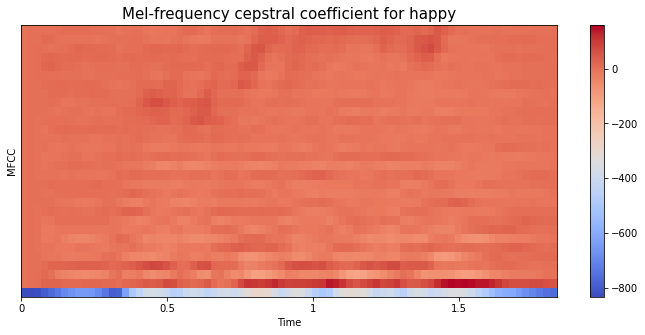

In [ ]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[6]
data, sr = librosa.load(path,sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
create_mfcc(data,sr,emotion)

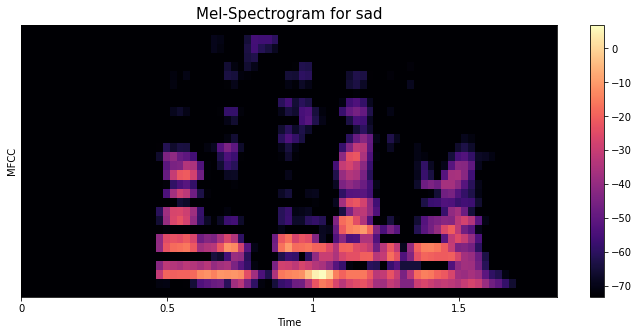

In [ ]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sr = librosa.load(path,sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
create_mel_spec(data,sr,emotion)

In [ ]:
sampling_rate=16000
audio_duration=2.5
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,79,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,40000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=1)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mel=prepare_data(Ravdess_df,n=30,mfcc=0,mel=1)

  0%|          | 3/1440 [00:00<05:39,  4.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|          | 8/1440 [00:01<02:14, 10.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel 

  1%|          | 12/1440 [00:01<01:41, 14.06it/s]

(30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|          | 16/1440 [00:01<01:28, 16.04it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|▏         | 20/1440 [00:01<01:21, 17.45it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 24/1440 [00:01<01:17, 18.26it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 28/1440 [00:02<01:14, 18.88it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 32/1440 [00:02<01:13, 19.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 37/1440 [00:02<01:11, 19.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 42/1440 [00:02<01:10, 19.92it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 45/1440 [00:03<01:09, 20.07it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▎         | 51/1440 [00:03<01:08, 20.39it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▍         | 56/1440 [00:03<01:09, 19.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▍         | 61/1440 [00:03<01:09, 19.92it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▍         | 64/1440 [00:03<01:08, 20.09it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▍         | 69/1440 [00:04<01:10, 19.53it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▌         | 73/1440 [00:04<01:11, 18.99it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▌         | 78/1440 [00:04<01:09, 19.49it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)

  6%|▌         | 82/1440 [00:04<01:09, 19.45it/s]


mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▌         | 86/1440 [00:05<01:11, 18.99it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▌         | 89/1440 [00:05<01:09, 19.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 94/1440 [00:05<01:09, 19.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 100/1440 [00:05<01:06, 20.06it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 103/1440 [00:05<01:06, 20.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 109/1440 [00:06<01:05, 20.39it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 112/1440 [00:06<01:04, 20.47it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 118/1440 [00:06<01:06, 19.97it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▊         | 124/1440 [00:07<01:04, 20.29it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▉         | 127/1440 [00:07<01:04, 20.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▉         | 133/1440 [00:07<01:04, 20.36it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▉         | 136/1440 [00:07<01:05, 19.83it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|▉         | 142/1440 [00:07<01:04, 20.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|█         | 148/1440 [00:08<01:03, 20.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|█         | 151/1440 [00:08<01:03, 20.32it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█         | 157/1440 [00:08<01:04, 19.80it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█▏        | 162/1440 [00:08<01:04, 19.84it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 167/1440 [00:09<01:03, 19.93it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 172/1440 [00:09<01:03, 20.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 176/1440 [00:09<01:06, 19.06it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▎        | 180/1440 [00:09<01:05, 19.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 184/1440 [00:10<01:05, 19.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 189/1440 [00:10<01:04, 19.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 194/1440 [00:10<01:02, 19.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▍        | 199/1440 [00:10<01:03, 19.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▍        | 203/1440 [00:11<01:03, 19.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▍        | 207/1440 [00:11<01:04, 19.07it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▍        | 211/1440 [00:11<01:04, 19.09it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▍        | 215/1440 [00:11<01:05, 18.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▌        | 219/1440 [00:11<01:06, 18.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▌        | 223/1440 [00:12<01:06, 18.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▌        | 227/1440 [00:12<01:05, 18.54it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▌        | 232/1440 [00:12<01:02, 19.25it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▋        | 236/1440 [00:12<01:05, 18.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 240/1440 [00:13<01:06, 17.97it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 244/1440 [00:13<01:04, 18.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 17%|█▋        | 248/1440 [00:13<01:02, 19.10it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 252/1440 [00:13<01:02, 19.02it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 256/1440 [00:13<01:02, 18.83it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 260/1440 [00:14<01:02, 18.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 264/1440 [00:14<01:01, 19.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▊        | 268/1440 [00:14<01:01, 19.11it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▉        | 272/1440 [00:14<01:03, 18.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▉        | 276/1440 [00:14<01:02, 18.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▉        | 280/1440 [00:15<01:01, 18.78it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|█▉        | 284/1440 [00:15<01:03, 18.18it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|██        | 288/1440 [00:15<01:03, 18.10it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|██        | 292/1440 [00:15<01:03, 17.96it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██        | 296/1440 [00:16<01:03, 18.09it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██        | 301/1440 [00:16<00:59, 19.14it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██        | 305/1440 [00:16<00:59, 19.11it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██▏       | 309/1440 [00:16<01:01, 18.37it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 313/1440 [00:16<01:00, 18.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 318/1440 [00:17<00:58, 19.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 323/1440 [00:17<00:56, 19.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 328/1440 [00:17<00:55, 19.97it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 333/1440 [00:17<00:56, 19.59it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 337/1440 [00:18<00:58, 18.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▎       | 341/1440 [00:18<00:57, 19.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▍       | 345/1440 [00:18<00:57, 19.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▍       | 349/1440 [00:18<00:57, 18.87it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▍       | 354/1440 [00:19<00:55, 19.60it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▍       | 358/1440 [00:19<00:54, 19.70it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▌       | 362/1440 [00:19<00:56, 19.09it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▌       | 366/1440 [00:19<00:56, 19.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▌       | 370/1440 [00:19<00:57, 18.56it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▌       | 374/1440 [00:20<00:57, 18.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▋       | 378/1440 [00:20<00:56, 18.75it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 382/1440 [00:20<00:55, 18.92it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 386/1440 [00:20<00:55, 18.86it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 390/1440 [00:21<00:56, 18.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 394/1440 [00:21<00:55, 18.80it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 398/1440 [00:21<00:54, 18.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 402/1440 [00:21<00:55, 18.62it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 406/1440 [00:21<00:56, 18.16it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 410/1440 [00:22<00:56, 18.22it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▉       | 414/1440 [00:22<00:55, 18.62it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▉       | 418/1440 [00:22<00:53, 19.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▉       | 422/1440 [00:22<00:52, 19.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|██▉       | 426/1440 [00:22<00:53, 19.03it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|██▉       | 430/1440 [00:23<00:53, 18.82it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|███       | 435/1440 [00:23<00:51, 19.42it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|███       | 439/1440 [00:23<00:51, 19.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███       | 443/1440 [00:23<00:51, 19.35it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███       | 447/1440 [00:24<00:51, 19.12it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███▏      | 451/1440 [00:24<00:52, 19.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 456/1440 [00:24<00:50, 19.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 460/1440 [00:24<00:50, 19.40it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 464/1440 [00:24<00:49, 19.64it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▎      | 468/1440 [00:25<00:50, 19.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 474/1440 [00:25<00:48, 20.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 480/1440 [00:25<00:47, 20.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 34%|███▎      | 483/1440 [00:25<00:47, 20.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 34%|███▍      | 489/1440 [00:26<00:47, 19.97it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 34%|███▍      | 492/1440 [00:26<00:47, 20.03it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 35%|███▍      | 497/1440 [00:26<00:49, 19.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 35%|███▍      | 501/1440 [00:26<00:49, 18.88it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 35%|███▌      | 505/1440 [00:27<00:51, 18.25it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 35%|███▌      | 510/1440 [00:27<00:48, 19.17it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 36%|███▌      | 514/1440 [00:27<00:48, 19.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 36%|███▌      | 518/1440 [00:27<00:50, 18.38it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 36%|███▋      | 522/1440 [00:27<00:49, 18.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 37%|███▋      | 526/1440 [00:28<00:49, 18.44it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 37%|███▋      | 530/1440 [00:28<00:48, 18.87it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 37%|███▋      | 534/1440 [00:28<00:47, 19.12it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 37%|███▋      | 538/1440 [00:28<00:47, 18.82it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 38%|███▊      | 543/1440 [00:29<00:46, 19.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 38%|███▊      | 548/1440 [00:29<00:46, 19.35it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 38%|███▊      | 551/1440 [00:29<00:45, 19.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 39%|███▊      | 557/1440 [00:29<00:43, 20.07it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 39%|███▉      | 562/1440 [00:29<00:43, 20.03it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 39%|███▉      | 564/1440 [00:30<00:46, 19.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 40%|███▉      | 570/1440 [00:30<00:43, 19.84it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 40%|███▉      | 575/1440 [00:30<00:43, 20.10it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 40%|████      | 581/1440 [00:30<00:42, 20.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 41%|████      | 584/1440 [00:31<00:42, 20.29it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 41%|████      | 590/1440 [00:31<00:42, 19.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 41%|████      | 593/1440 [00:31<00:42, 20.09it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 42%|████▏     | 599/1440 [00:31<00:41, 20.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 42%|████▏     | 602/1440 [00:31<00:41, 20.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 42%|████▏     | 607/1440 [00:32<00:42, 19.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 42%|████▏     | 611/1440 [00:32<00:42, 19.37it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 43%|████▎     | 615/1440 [00:32<00:42, 19.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 43%|████▎     | 620/1440 [00:32<00:41, 19.64it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 43%|████▎     | 625/1440 [00:33<00:42, 19.35it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 44%|████▎     | 629/1440 [00:33<00:42, 18.91it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 44%|████▍     | 634/1440 [00:33<00:41, 19.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 44%|████▍     | 638/1440 [00:33<00:41, 19.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 45%|████▍     | 642/1440 [00:34<00:41, 19.25it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 45%|████▍     | 646/1440 [00:34<00:42, 18.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 45%|████▌     | 651/1440 [00:34<00:40, 19.32it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 46%|████▌     | 656/1440 [00:34<00:40, 19.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 46%|████▌     | 660/1440 [00:35<00:40, 19.45it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 46%|████▌     | 664/1440 [00:35<00:41, 18.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 46%|████▋     | 668/1440 [00:35<00:41, 18.53it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 47%|████▋     | 673/1440 [00:35<00:40, 18.99it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 47%|████▋     | 678/1440 [00:35<00:39, 19.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 47%|████▋     | 680/1440 [00:36<00:39, 19.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 48%|████▊     | 685/1440 [00:36<00:39, 18.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 48%|████▊     | 689/1440 [00:36<00:40, 18.56it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 48%|████▊     | 693/1440 [00:36<00:39, 18.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 48%|████▊     | 697/1440 [00:37<00:39, 18.64it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 49%|████▊     | 701/1440 [00:37<00:40, 18.45it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 49%|████▉     | 705/1440 [00:37<00:40, 18.37it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 49%|████▉     | 709/1440 [00:37<00:40, 18.17it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 50%|████▉     | 713/1440 [00:37<00:39, 18.53it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 50%|████▉     | 717/1440 [00:38<00:39, 18.22it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 50%|█████     | 721/1440 [00:38<00:39, 18.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 50%|█████     | 726/1440 [00:38<00:37, 19.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 51%|█████     | 731/1440 [00:38<00:36, 19.50it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 51%|█████     | 735/1440 [00:39<00:37, 18.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 51%|█████▏    | 739/1440 [00:39<00:37, 18.60it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 52%|█████▏    | 743/1440 [00:39<00:38, 18.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 52%|█████▏    | 747/1440 [00:39<00:37, 18.43it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 52%|█████▏    | 752/1440 [00:39<00:36, 19.11it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 52%|█████▎    | 756/1440 [00:40<00:36, 18.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 53%|█████▎    | 760/1440 [00:40<00:37, 17.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 53%|█████▎    | 763/1440 [00:40<00:35, 18.82it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 53%|█████▎    | 769/1440 [00:40<00:33, 19.75it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 54%|█████▎    | 773/1440 [00:41<00:35, 18.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 54%|█████▍    | 777/1440 [00:41<00:35, 18.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 54%|█████▍    | 781/1440 [00:41<00:35, 18.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 55%|█████▍    | 785/1440 [00:41<00:35, 18.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 55%|█████▍    | 789/1440 [00:41<00:34, 19.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 55%|█████▌    | 793/1440 [00:42<00:34, 18.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 55%|█████▌    | 797/1440 [00:42<00:33, 19.11it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 56%|█████▌    | 801/1440 [00:42<00:33, 19.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 56%|█████▌    | 805/1440 [00:42<00:33, 19.06it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 56%|█████▌    | 809/1440 [00:42<00:33, 19.04it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 56%|█████▋    | 813/1440 [00:43<00:33, 18.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 57%|█████▋    | 817/1440 [00:43<00:33, 18.33it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 57%|█████▋    | 821/1440 [00:43<00:32, 18.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 57%|█████▋    | 825/1440 [00:43<00:32, 18.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 58%|█████▊    | 829/1440 [00:44<00:32, 18.90it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 58%|█████▊    | 833/1440 [00:44<00:31, 19.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 58%|█████▊    | 837/1440 [00:44<00:32, 18.54it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 59%|█████▊    | 843/1440 [00:44<00:30, 19.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 59%|█████▉    | 847/1440 [00:45<00:31, 18.58it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 59%|█████▉    | 851/1440 [00:45<00:31, 18.55it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 59%|█████▉    | 855/1440 [00:45<00:30, 18.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 60%|█████▉    | 859/1440 [00:45<00:30, 18.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 60%|█████▉    | 863/1440 [00:45<00:30, 18.83it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 60%|██████    | 867/1440 [00:46<00:31, 18.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 60%|██████    | 871/1440 [00:46<00:31, 17.90it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 61%|██████    | 875/1440 [00:46<00:31, 18.13it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 61%|██████    | 879/1440 [00:46<00:29, 18.82it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 61%|██████▏   | 883/1440 [00:46<00:30, 18.47it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 62%|██████▏   | 887/1440 [00:47<00:29, 18.70it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 62%|██████▏   | 891/1440 [00:47<00:29, 18.92it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 62%|██████▏   | 893/1440 [00:47<00:30, 17.91it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 62%|██████▏   | 899/1440 [00:47<00:28, 19.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 63%|██████▎   | 903/1440 [00:48<00:27, 19.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 63%|██████▎   | 907/1440 [00:48<00:27, 19.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 63%|██████▎   | 911/1440 [00:48<00:27, 18.97it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 63%|██████▎   | 913/1440 [00:48<00:29, 18.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 64%|██████▍   | 918/1440 [00:48<00:27, 18.81it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 64%|██████▍   | 923/1440 [00:49<00:26, 19.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 64%|██████▍   | 928/1440 [00:49<00:26, 19.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 65%|██████▍   | 932/1440 [00:49<00:26, 19.06it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 65%|██████▍   | 934/1440 [00:49<00:26, 18.93it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 65%|██████▌   | 940/1440 [00:49<00:25, 19.70it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 66%|██████▌   | 944/1440 [00:50<00:25, 19.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 66%|██████▌   | 950/1440 [00:50<00:24, 20.12it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 66%|██████▌   | 953/1440 [00:50<00:25, 19.42it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 67%|██████▋   | 958/1440 [00:50<00:24, 19.51it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 67%|██████▋   | 962/1440 [00:51<00:24, 19.56it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)

 67%|██████▋   | 967/1440 [00:51<00:23, 19.84it/s]


mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 67%|██████▋   | 970/1440 [00:51<00:23, 20.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 68%|██████▊   | 975/1440 [00:51<00:23, 19.40it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 68%|██████▊   | 979/1440 [00:51<00:23, 19.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 68%|██████▊   | 983/1440 [00:52<00:23, 19.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 69%|██████▊   | 987/1440 [00:52<00:23, 19.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 69%|██████▉   | 991/1440 [00:52<00:23, 19.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 69%|██████▉   | 996/1440 [00:52<00:22, 19.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel 

 69%|██████▉   | 1000/1440 [00:53<00:22, 19.38it/s]

(30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 70%|██████▉   | 1005/1440 [00:53<00:22, 19.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 70%|███████   | 1008/1440 [00:53<00:21, 19.82it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 70%|███████   | 1013/1440 [00:53<00:22, 19.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 71%|███████   | 1017/1440 [00:53<00:21, 19.60it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 71%|███████   | 1023/1440 [00:54<00:20, 19.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 71%|███████▏  | 1028/1440 [00:54<00:20, 20.14it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 72%|███████▏  | 1031/1440 [00:54<00:20, 20.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 72%|███████▏  | 1036/1440 [00:54<00:20, 19.38it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 72%|███████▏  | 1040/1440 [00:55<00:20, 19.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 72%|███████▎  | 1044/1440 [00:55<00:20, 19.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 73%|███████▎  | 1048/1440 [00:55<00:20, 19.09it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 73%|███████▎  | 1052/1440 [00:55<00:21, 18.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 73%|███████▎  | 1056/1440 [00:55<00:21, 17.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 74%|███████▎  | 1060/1440 [00:56<00:21, 17.87it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 74%|███████▍  | 1064/1440 [00:56<00:20, 18.40it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 74%|███████▍  | 1069/1440 [00:56<00:19, 19.29it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 75%|███████▍  | 1073/1440 [00:56<00:20, 17.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 75%|███████▍  | 1077/1440 [00:57<00:19, 18.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 75%|███████▌  | 1081/1440 [00:57<00:19, 18.84it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 75%|███████▌  | 1085/1440 [00:57<00:18, 18.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 76%|███████▌  | 1089/1440 [00:57<00:18, 19.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 76%|███████▌  | 1093/1440 [00:57<00:18, 18.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 76%|███████▌  | 1097/1440 [00:58<00:18, 19.04it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 77%|███████▋  | 1102/1440 [00:58<00:17, 19.54it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 77%|███████▋  | 1106/1440 [00:58<00:16, 19.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 77%|███████▋  | 1110/1440 [00:58<00:17, 18.55it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 77%|███████▋  | 1114/1440 [00:59<00:17, 18.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 78%|███████▊  | 1118/1440 [00:59<00:17, 18.86it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 78%|███████▊  | 1122/1440 [00:59<00:16, 18.93it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 78%|███████▊  | 1126/1440 [00:59<00:16, 18.50it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 79%|███████▊  | 1131/1440 [00:59<00:16, 18.54it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 79%|███████▉  | 1135/1440 [01:00<00:16, 19.03it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 79%|███████▉  | 1139/1440 [01:00<00:15, 19.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 79%|███████▉  | 1142/1440 [01:00<00:15, 19.33it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 80%|███████▉  | 1147/1440 [01:00<00:14, 19.60it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 80%|███████▉  | 1151/1440 [01:01<00:15, 19.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 80%|████████  | 1155/1440 [01:01<00:14, 19.16it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 80%|████████  | 1159/1440 [01:01<00:14, 19.26it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 81%|████████  | 1163/1440 [01:01<00:14, 18.90it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 81%|████████  | 1167/1440 [01:01<00:14, 18.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 81%|████████▏ | 1171/1440 [01:02<00:14, 18.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 82%|████████▏ | 1175/1440 [01:02<00:14, 18.83it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 82%|████████▏ | 1180/1440 [01:02<00:13, 19.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 82%|████████▏ | 1184/1440 [01:02<00:13, 19.45it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)

 82%|████████▎ | 1188/1440 [01:02<00:13, 18.36it/s]


mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 83%|████████▎ | 1192/1440 [01:03<00:13, 18.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 83%|████████▎ | 1196/1440 [01:03<00:12, 19.13it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 83%|████████▎ | 1200/1440 [01:03<00:12, 19.12it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 84%|████████▎ | 1204/1440 [01:03<00:12, 19.15it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 84%|████████▍ | 1208/1440 [01:04<00:12, 18.49it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 84%|████████▍ | 1213/1440 [01:04<00:11, 19.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 85%|████████▍ | 1217/1440 [01:04<00:11, 19.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 85%|████████▍ | 1221/1440 [01:04<00:11, 18.36it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 85%|████████▌ | 1225/1440 [01:04<00:11, 18.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 85%|████████▌ | 1229/1440 [01:05<00:11, 18.55it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 86%|████████▌ | 1233/1440 [01:05<00:11, 18.64it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 86%|████████▌ | 1238/1440 [01:05<00:10, 19.45it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 86%|████████▋ | 1242/1440 [01:05<00:10, 19.17it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 87%|████████▋ | 1246/1440 [01:06<00:10, 18.47it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 87%|████████▋ | 1251/1440 [01:06<00:09, 19.39it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 87%|████████▋ | 1255/1440 [01:06<00:09, 19.61it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 87%|████████▋ | 1259/1440 [01:06<00:09, 19.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 88%|████████▊ | 1261/1440 [01:06<00:09, 19.59it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)

 88%|████████▊ | 1266/1440 [01:07<00:08, 19.33it/s]


mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 88%|████████▊ | 1271/1440 [01:07<00:08, 19.59it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 89%|████████▊ | 1275/1440 [01:07<00:08, 19.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 89%|████████▉ | 1279/1440 [01:07<00:08, 19.35it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 89%|████████▉ | 1283/1440 [01:07<00:08, 18.62it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 89%|████████▉ | 1287/1440 [01:08<00:08, 18.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 90%|████████▉ | 1292/1440 [01:08<00:07, 19.16it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 90%|█████████ | 1296/1440 [01:08<00:07, 19.04it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 90%|█████████ | 1298/1440 [01:08<00:07, 19.06it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 90%|█████████ | 1303/1440 [01:09<00:07, 19.24it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 91%|█████████ | 1308/1440 [01:09<00:06, 19.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 91%|█████████▏| 1314/1440 [01:09<00:06, 19.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 91%|█████████▏| 1316/1440 [01:09<00:06, 19.79it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 92%|█████████▏| 1321/1440 [01:09<00:06, 19.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 92%|█████████▏| 1325/1440 [01:10<00:06, 18.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 92%|█████████▏| 1329/1440 [01:10<00:05, 18.50it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 93%|█████████▎| 1333/1440 [01:10<00:06, 17.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 93%|█████████▎| 1337/1440 [01:10<00:05, 18.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 93%|█████████▎| 1341/1440 [01:11<00:05, 18.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 93%|█████████▎| 1345/1440 [01:11<00:05, 18.11it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 94%|█████████▎| 1349/1440 [01:11<00:04, 18.42it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 94%|█████████▍| 1353/1440 [01:11<00:04, 18.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 94%|█████████▍| 1357/1440 [01:11<00:04, 18.38it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 95%|█████████▍| 1361/1440 [01:12<00:04, 18.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 95%|█████████▍| 1365/1440 [01:12<00:04, 18.37it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 95%|█████████▌| 1369/1440 [01:12<00:03, 18.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 95%|█████████▌| 1373/1440 [01:12<00:03, 18.33it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 96%|█████████▌| 1377/1440 [01:13<00:03, 17.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 96%|█████████▌| 1381/1440 [01:13<00:03, 17.91it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 96%|█████████▌| 1385/1440 [01:13<00:02, 18.36it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 96%|█████████▋| 1389/1440 [01:13<00:02, 18.45it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 97%|█████████▋| 1393/1440 [01:13<00:02, 18.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 97%|█████████▋| 1397/1440 [01:14<00:02, 18.15it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 97%|█████████▋| 1401/1440 [01:14<00:02, 17.37it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 98%|█████████▊| 1405/1440 [01:14<00:01, 17.75it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 98%|█████████▊| 1409/1440 [01:14<00:01, 18.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 98%|█████████▊| 1413/1440 [01:15<00:01, 18.44it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 98%|█████████▊| 1417/1440 [01:15<00:01, 18.59it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 99%|█████████▊| 1421/1440 [01:15<00:01, 18.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 99%|█████████▉| 1425/1440 [01:15<00:00, 18.90it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 99%|█████████▉| 1429/1440 [01:15<00:00, 18.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


100%|█████████▉| 1433/1440 [01:16<00:00, 18.25it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


100%|█████████▉| 1437/1440 [01:16<00:00, 17.42it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


100%|██████████| 1440/1440 [01:16<00:00, 18.82it/s]

mel (30, 79, 1)
mel (30, 79, 1)


In [ ]:
# New model
model = Sequential()
model.add(Conv2D(256, (3,3), padding="same",input_shape=(30,79,1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8)) # Target class number
model.add(Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 79, 256)       2560      
                                                                 
 batch_normalization (BatchN  (None, 30, 79, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 79, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 39, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 39, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 39, 128)       2

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
Y = Ravdess_df['Emotions'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(Ravdess_df[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_angry,Emotions_calm,Emotions_disgust,Emotions_fear,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1435,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1436,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Split between train and test

X_train, X_test1, y_train, y_test1=train_test_split(mel
                                                    , encoded_labels
                                                    , test_size=0.3
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1008, 30, 79, 1) (130, 30, 79, 1) (302, 30, 79, 1) (1008, 8) (130, 8) (302, 8)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1008, 30, 79, 1) (130, 30, 79, 1) (302, 30, 79, 1) (1008, 8) (130, 8) (302, 8)


In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.93

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model_3.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=300,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/300
16/16 [==============================] - ETA: 0s - loss: 2.1441 - accuracy: 0.2073
Epoch 1: val_accuracy improved from -inf to 0.27815, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5
16/16 [==============================] - 18s 306ms/step - loss: 2.1441 - accuracy: 0.2073 - val_loss: 1.8978 - val_accuracy: 0.2781
Epoch 2/300
15/16 [===========================>..] - ETA: 0s - loss: 1.9565 - accuracy: 0.2667
Epoch 2: val_accuracy improved from 0.27815 to 0.32781, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5
16/16 [==============================] - 1s 50ms/step - loss: 1.9600 - accuracy: 0.2619 - val_loss: 1.8620 - val_accuracy: 0.3278
Epoch 3/300
15/16 [===========================>..] - ETA: 0s - loss: 1.8776 - accuracy: 0.2771
Epoch 3: val_accuracy did not improve from 0.32781
16/16 [==============================] - 1s 41ms/step - loss: 1.8808 - accuracy: 0.2768 - val_loss: 1.9120 - val_accuracy: 0.

In [ ]:
# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

5/5 [==============================] - 0s 33ms/step - loss: 0.9708 - accuracy: 0.7615
Accuracy of our model on test data :  76.15384459495544 %


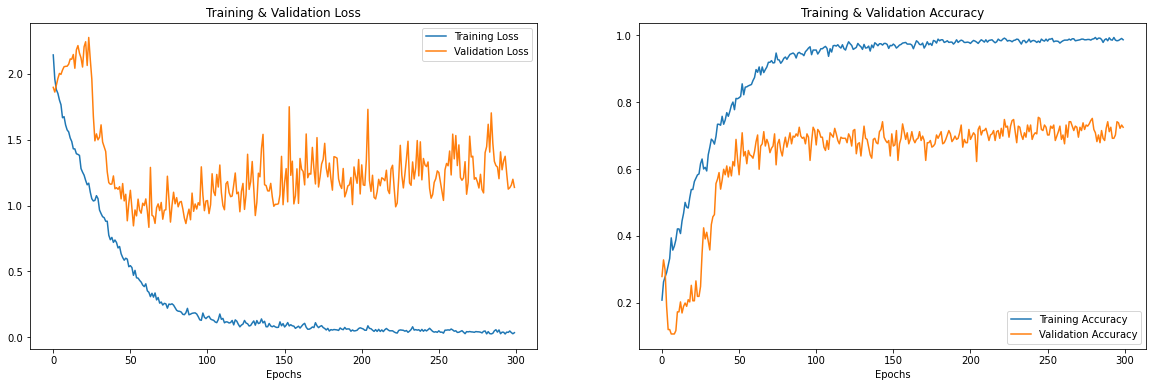

In [ ]:
epochs = [i for i in range(300)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

5/5 [==============================] - 0s 8ms/step


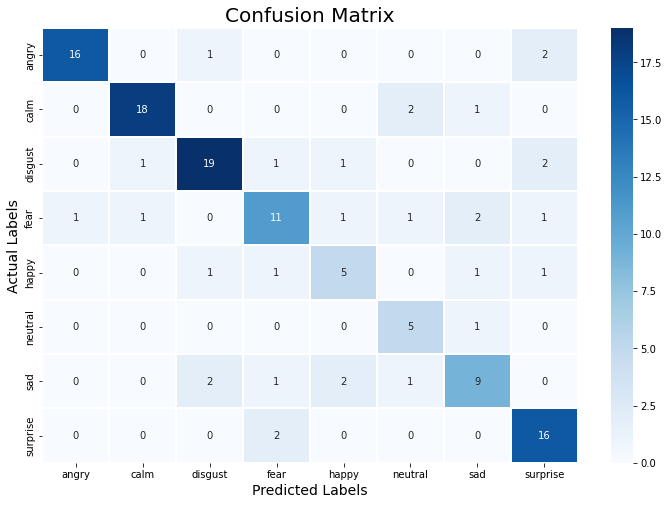

              precision    recall  f1-score   support

       angry       0.94      0.84      0.89        19
        calm       0.90      0.86      0.88        21
     disgust       0.83      0.79      0.81        24
        fear       0.69      0.61      0.65        18
       happy       0.56      0.56      0.56         9
     neutral       0.56      0.83      0.67         6
         sad       0.64      0.60      0.62        15
    surprise       0.73      0.89      0.80        18

    accuracy                           0.76       130
   macro avg       0.73      0.75      0.73       130
weighted avg       0.77      0.76      0.76       130



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))